In [ ]:
import os
# load repo with data if it is not exists
DATA_DIR = "/content/drive/My Drive/self_learning/FPN-Seg"
if not os.path.exists(DATA_DIR):
    print('Loading data...')
    os.system('git clone https://github.com/alexgkendall/SegNet-Tutorial ./data')
    print('Done!')

Loading data...
Done!


In [ ]:
dir_data = "/content/data/CamVid/"
dir_seg = dir_data + "trainannot/"
dir_img = dir_data + "train/"
dir_img_val= dir_data + "val/"
dir_img_valannot= dir_data + "valannot/"
dir_img_test= dir_data + "test/"
dir_img_testannot= dir_data + "testannot/"

seg.shape=(360, 480, 3), img_is.shape=(360, 480, 3)
0
11
minimum seg = 0, maximum seg = 11, Total number of segmentation classes = 12


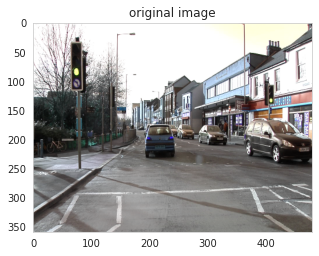

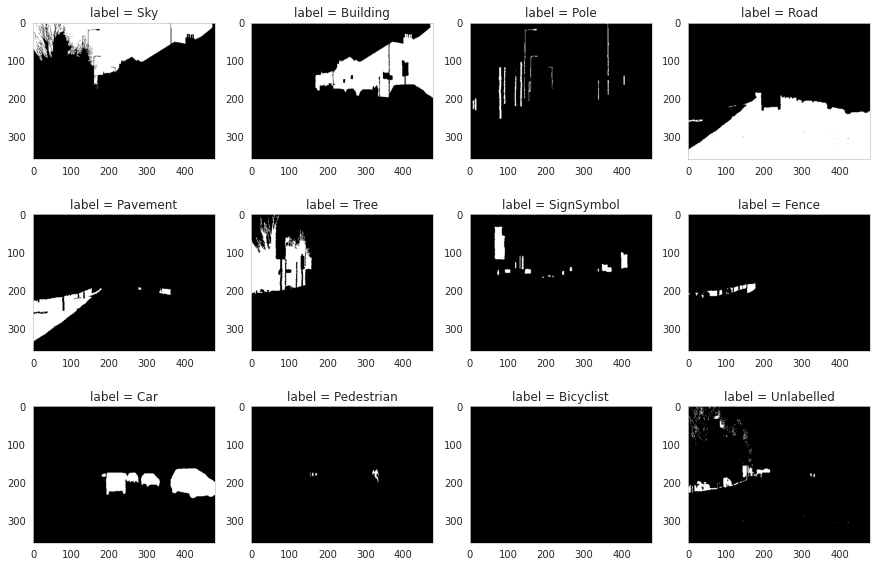

In [ ]:
import cv2, os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
## seaborn has white grid by default so I will get rid of this.
sns.set_style("whitegrid", {'axes.grid' : False})


ldseg = np.array(os.listdir(dir_seg))
## pick the first image file
fnm = ldseg[0]

## read in the original image and segmentation labels
seg = cv2.imread(dir_seg + fnm ) # (360, 480, 3)
img_is = cv2.imread(dir_img + fnm )
print("seg.shape={}, img_is.shape={}".format(seg.shape,img_is.shape))

## Check the number of labels
mi, ma = np.min(seg), np.max(seg)
print(mi)
print(ma)
n_classes = ma - mi + 1
print("minimum seg = {}, maximum seg = {}, Total number of segmentation classes = {}".format(mi,ma, n_classes))

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)
ax.imshow(img_is)
ax.set_title("original image")
plt.show()
label_colours = ['Sky', 'Building', 'Pole', 'Road', 'Pavement', 'Tree', 'SignSymbol', 'Fence', 'Car', 'Pedestrian', 'Bicyclist', 'Unlabelled']
fig = plt.figure(figsize=(15,10))
for k in range(mi,ma+1):
    ax = fig.add_subplot(3,n_classes/3,k+1)
    ax.imshow((seg == k)*1.0)
    ax.set_title("label = {}".format((label_colours[k])))


plt.show()

In [ ]:
import random
input_height , input_width = 224 , 224
output_height , output_width = 224 , 224


def getImageArr( path , width , height ):
        img = cv2.imread(path, 1)
        img = np.float32(cv2.resize(img, ( width , height )))
        return img

def getSegmentationArr( path , nClasses ,  width , height  ):

    seg_labels = np.zeros((  height , width  , nClasses ))
    img = cv2.imread(path, 1)
    img = cv2.resize(img, ( width , height ))
    img = img[:, : , 0]

    for c in range(nClasses):
        seg_labels[: , : , c ] = (img == c ).astype(int)
    ##seg_labels = np.reshape(seg_labels, ( width*height,nClasses  ))
    return seg_labels




images = os.listdir(dir_img)
images.sort()
print("images_train: ",len(images))
images_val = os.listdir(dir_img_val)
images_val.sort()
print("images_val: ",len(images_val))
images_test = os.listdir(dir_img_test)
images_test.sort()
print("images_test: ",len(images_test))

segmentations  = os.listdir(dir_seg)
print("segmentations_train:", len(segmentations))
segmentations.sort()
segmentations_val  = os.listdir(dir_img_valannot)
print("segmentations_val:", len(segmentations_val))
segmentations_val.sort()
segmentations_test  = os.listdir(dir_img_testannot)
print("segmentations_test:", len(segmentations_test ))
segmentations_test.sort()


    
train = []
trainannot = []
for im , seg in zip(images,segmentations) :
    train.append( getImageArr(dir_img + im , input_width , input_height )  )
    trainannot.append( getSegmentationArr( dir_seg + seg , n_classes , output_width , output_height )  )

train, trainannot = np.array(train) , np.array(trainannot)
print(train.shape,trainannot.shape)

test = []
testannot = []
for im1 , seg1 in zip(images_test,segmentations_test) :
    test.append( getImageArr(dir_img_test + im1 , input_width , input_height )  )
    testannot.append( getSegmentationArr( dir_img_testannot + seg1 , n_classes , output_width , output_height )  )

test, testannot = np.array(test) , np.array(testannot)
print(test.shape,testannot.shape)

val = []
valannot = []
for im2 , seg2 in zip(images_val,segmentations_val) :
    val.append( getImageArr(dir_img_val + im2 , input_width , input_height )  )
    valannot.append( getSegmentationArr( dir_img_valannot + seg2 , n_classes , output_width , output_height )  )

val, valannot = np.array(val) , np.array(valannot)
print(val.shape,valannot.shape)

images_train:  367
images_val:  101
images_test:  233
segmentations_train: 367
segmentations_val: 101
segmentations_test: 233
(367, 224, 224, 3) (367, 224, 224, 12)
(233, 224, 224, 3) (233, 224, 224, 12)
(101, 224, 224, 3) (101, 224, 224, 12)


## **FULLY CONVOLUTIONAL NETWORKS**

In [ ]:
import tensorflow as tf
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten,Conv2DTranspose
from keras.models import load_model, Model
from tensorflow.compat.v1.keras.backend import set_session
import keras, sys, time, warnings
from keras import optimizers
from keras.models import *
from keras.layers import *
import pandas as pd 
warnings.filterwarnings("ignore")
import os
class FCN8:
  def __init__(self):
    return None
  def build(self, nClass,input_weight, input_height):
    input = Input(shape=(input_weight,input_height,3))

    t = Conv2D(64, (3,3), padding="same", activation = "relu",name = "conv1.1")(input)
    t = Conv2D(64, (3,3), padding="same", activation = "relu",name = "conv1.2")(t)
    t = MaxPooling2D((2,2), strides =(2,2), name = "pooling1")(t)
    pool1= t

    t = Conv2D(128, (3,3), padding = "same", activation = "relu", name = "conv2.1")(t)
    t = Conv2D(128, (3,3), padding = "same", activation = "relu", name = "conv2.2")(t)
    t = MaxPooling2D(( 2,2), strides =(2,2), name ="pooling2")(t)
    pool2=t

    t = Conv2D(256, (3,3), padding = "same", activation = "relu", name = "conv3.1")(t)
    t = Conv2D(256, (3,3), padding = "same", activation = "relu", name = "conv3.2")(t)
    t = Conv2D(256, (3,3), padding = "same", activation = "relu", name = "conv3.3")(t)
    t = MaxPooling2D((2,2), strides = (2,2), name ="pooling3")(t)
    pool3= t

    t = Conv2D(512, (3,3), padding ="same", activation = "relu", name = "conv4.1")(t)
    t = Conv2D(512, (3,3), padding = "same", activation = "relu", name = "conv4.2")(t)
    t = Conv2D(512, (3,3), padding = "same", activation = "relu", name = "conv4.3")(t)
    t = MaxPooling2D((2,2), strides =(2,2), name ="pooling4")(t)
    pool4 = t

    t =Conv2D(512, (3,3), padding = "same", activation = "relu", name = "conv5.1")(t)
    t = Conv2D(512, (3,3), padding ="same", activation = "relu", name = "conv5.2")(t)
    t = Conv2D(512, (3,3), padding ="same", activation = "relu", name = "conv5.3")(t)
    t = MaxPooling2D((2,2), strides = (2,2), name = "pooling5")(t)
    pool5= t
    
    # self.model(input, pool5)
    n=4096
    conv6 = (Conv2D(n, (7,7), padding = "same", activation = "relu", name = "conv6"))(pool5)
    conv7 = (Conv2D(n, (1,1), padding = "same", activation = "relu", name = "conv7"))(conv6)

    conv7_4 = Conv2DTranspose(nClass, kernel_size=(4,4), strides = (4,4) , use_bias=False, activation = "relu")(conv7)

    pool4_11 = Conv2D(nClass,(1,1), activation = "relu", name ="pooling4_11")(pool4)
    pool411_2 = (Conv2DTranspose(nClass, kernel_size=(2,2),strides= (2,2) , use_bias=False, activation = "relu"))(pool4_11)

    pool3_11 = Conv2D(nClass,(1,1), padding = "same", activation = "relu", name = "pooling3_11")(pool3)

    m = Add(name = "add")([pool3_11,pool411_2,conv7_4])
    m = Conv2DTranspose(nClass, kernel_size = (8,8),  strides=(8,8) , activation= "relu", use_bias=False)(m)
    m=(Activation('softmax'))(m)

    self.model =Model(input,m)
    return self.model
  def train(self, x_train, y_train,X_val,y_val):
    self.model.compile(optimizer = 'adam', loss = 'categorical_crossentropy',metrics=['accuracy'])
    return self.model.fit(x_train,y_train,validation_data=(X_val,y_val),
                  batch_size=16,epochs=100,verbose=2)
  
  def save(self, model_file):
    return self.model.save(model_file)
  
  def load(self, model_file):
    self.model = load_model(model_file)

  def summary(self):
    self.model.summary()

  def predict(self, x_test):
    return self.model.predict(x_test)


In [ ]:
modelFCN = FCN8()
modelFCN.build(nClass  = 12,  input_weight = 224, input_height  = 224)
modelFCN.summary()


Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1.1 (Conv2D)                (None, 224, 224, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
conv1.2 (Conv2D)                (None, 224, 224, 64) 36928       conv1.1[0][0]                    
__________________________________________________________________________________________________
pooling1 (MaxPooling2D)         (None, 112, 112, 64) 0           conv1.2[0][0]                    
_______________________________________________________________________________________

In [ ]:
k1=modelFCN.train(train,trainannot,val,valannot)

Epoch 1/100
23/23 - 18s - loss: 2.4358 - accuracy: 0.1622 - val_loss: 2.3322 - val_accuracy: 0.1889
Epoch 2/100
23/23 - 15s - loss: 2.0699 - accuracy: 0.2671 - val_loss: 1.9816 - val_accuracy: 0.2839
Epoch 3/100
23/23 - 16s - loss: 1.6675 - accuracy: 0.4320 - val_loss: 1.6898 - val_accuracy: 0.4400
Epoch 4/100
23/23 - 16s - loss: 1.3848 - accuracy: 0.5796 - val_loss: 1.3707 - val_accuracy: 0.5709
Epoch 5/100


KeyboardInterrupt: ignored

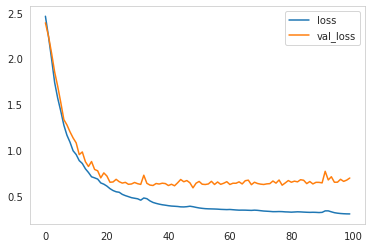

In [ ]:
for key in ['loss', 'val_loss']:
    plt.plot(k1.history[key],label=key)
plt.legend()
plt.show()

In [ ]:
y_pred = modelFCN.predict(test)
y_predi = np.argmax(y_pred, axis=3)
test_annot = np.argmax(testannot, axis=3)
print(test_annot.shape,y_predi.shape)
def IoU(Yi,y_predi):
    ## mean Intersection over Union
    ## Mean IoU = TP/(FN + TP + FP)

    IoUs = []
    Nclass = int(np.max(Yi)) + 1
    for c in range(Nclass):
        TP = np.sum( (Yi == c)&(y_predi==c) )
        FP = np.sum( (Yi != c)&(y_predi==c) )
        FN = np.sum( (Yi == c)&(y_predi != c)) 
        IoU = TP/float(TP + FP + FN)
        print("class {:02.0f}: #TP={:6.0f}, #FP={:6.0f}, #FN={:5.0f}, IoU={:4.3f}".format(c,TP,FP,FN,IoU))
        IoUs.append(IoU)
    mIoU = np.mean(IoUs)
    print("_________________")
    print("Mean IoU: {:4.3f}".format(mIoU))
    
IoU(test_annot,y_predi)

(233, 224, 224) (233, 224, 224)
class 00: #TP=1784868, #FP=334556, #FN=137202, IoU=0.791
class 01: #TP=2384048, #FP=695169, #FN=490929, IoU=0.668
class 02: #TP=  4405, #FP= 76840, #FN=157942, IoU=0.018
class 03: #TP=2914340, #FP=453176, #FN=150605, IoU=0.828
class 04: #TP=602806, #FP=191164, #FN=513535, IoU=0.461
class 05: #TP=920734, #FP=349977, #FN=362616, IoU=0.564
class 06: #TP= 19390, #FP= 65113, #FN=115291, IoU=0.097
class 07: #TP= 12431, #FP= 46251, #FN=145388, IoU=0.061
class 08: #TP=321829, #FP= 98559, #FN=155149, IoU=0.559
class 09: #TP=  4653, #FP= 41880, #FN=79512, IoU=0.037
class 10: #TP=  1064, #FP=  6390, #FN=41158, IoU=0.022
class 11: #TP=142584, #FP=218781, #FN=228529, IoU=0.242
_________________
Mean IoU: 0.362


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


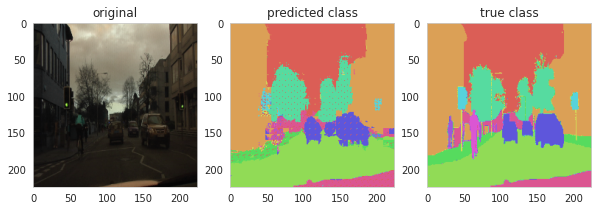

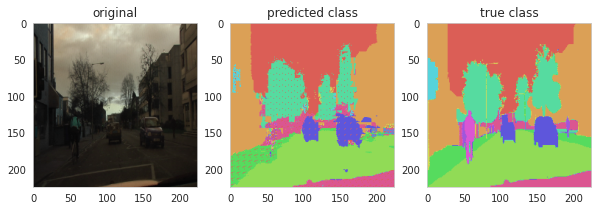

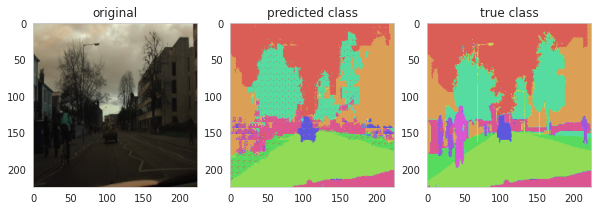

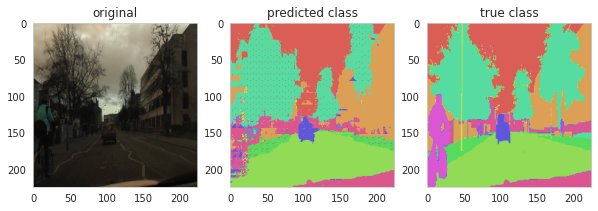

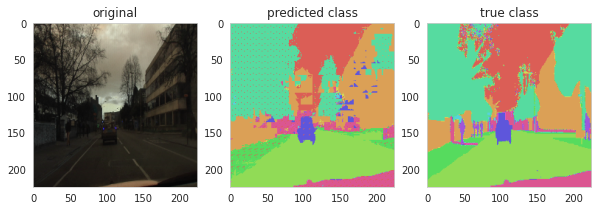

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


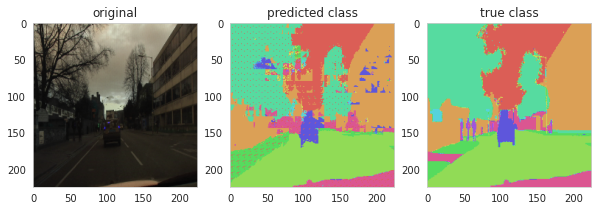

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


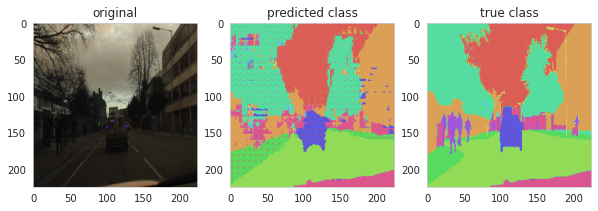

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


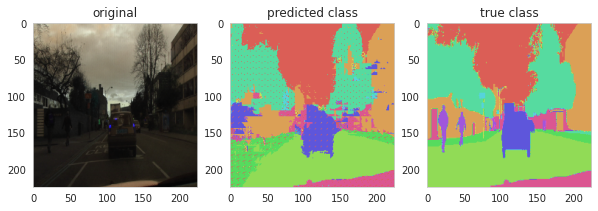

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


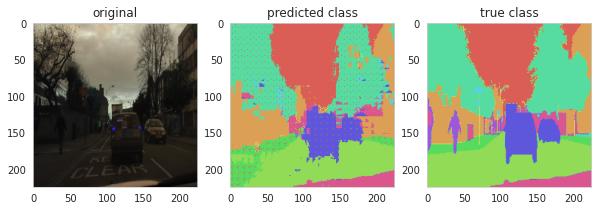

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


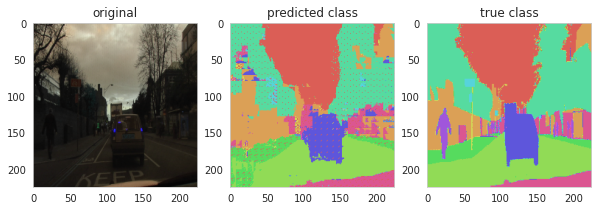

In [ ]:
shape = (224,224)
n_classes= 12

for i in range(10):
    img_is  = (test[i] + 1)
    seg = y_predi[i]
    segtest = test_annot[i]

    fig = plt.figure(figsize=(10,30))    
    ax = fig.add_subplot(1,3,1)
    ax.imshow(img_is/255.0)
    ax.set_title("original")
    
    ax = fig.add_subplot(1,3,2)
    ax.imshow(give_color_to_seg_img(seg,n_classes))
    ax.set_title("predicted class")
    
    ax = fig.add_subplot(1,3,3)
    ax.imshow(give_color_to_seg_img(segtest,n_classes))
    ax.set_title("true class")
    plt.show()

## **UNET**

In [ ]:
import tensorflow as tf
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten,Conv2DTranspose, concatenate
from keras.models import load_model, Model
from tensorflow.compat.v1.keras.backend import set_session
import keras, sys, time, warnings
from keras.models import *
import numpy as np
from keras.layers import *
import pandas as pd 
class Unet:
  def __init__(self):
    return None
  def build(self, nclass, input_weight, input_height):
     input = Input(shape=(input_weight, input_height,3))

    #block1
     t = Conv2D(64,(3,3),activation = 'relu', padding = 'same', name= 'block1_conv1', data_format='channels_last')(input)
     t = Conv2D(64,(3,3),activation = 'relu', padding = 'same', name= 'block1_conv2', data_format= 'channels_last')(t)
     conv1 = t
     t = MaxPooling2D((2,2), strides=(2,2),name='block_pool1',data_format='channels_last' )(t)
     pool1 = t
     
     #block2

     t = Conv2D(128,(3,3), activation = 'relu', padding ='same', name = 'block2_conv1', data_format ='channels_last')(t)
     t = Conv2D(128,(3,3), activation = 'relu', padding ='same', name = 'block2_conv2', data_format ='channels_last')(t)
     conv2 = t
     t = MaxPooling2D((2,2), strides=(2,2), name='block_pool2',data_format='channels_last')(t)
     pool2=t

     #block3

     t = Conv2D(256,(3,3),activation = 'relu',padding='same',name = 'block3_conv5', data_format ='channels_last')(t)
     t = Conv2D(256,(3,3),activation = 'relu',padding= 'same',name ='block3_conv6', data_format ='channels_last')(t)
     conv3 = t
     t = MaxPooling2D((2,2), strides=(2,2), name='block_pool3',data_format = 'channels_last')(t)
     pool3=t

     #block4

     t=Conv2D(512,(3,3),activation = 'relu',padding='same',name ='block4_conv7',data_format = 'channels_last')(t)
     t=Conv2D(512,(3,3),activation = 'relu', padding='same',name='block4_con',data_format = 'channels_last')(t)
     conv4=t
     t = MaxPooling2D((2,2), strides=(2,2), name='block_pool4',data_format ='channels_last')(t)

     #middle

     t = Conv2D(1024,(3,3),activation = 'relu', padding='same',name = 'middel_conv1',data_format='channels_last')(t)
     t = Conv2D(1024,(3,3),activation = 'relu', padding='same',name = 'middel_conv2',data_format='channels_last')(t)


     #expantion path

     deconv4 = Conv2DTranspose(512,(2,2),strides=(2,2),activation='relu',padding='same',name = 'expan1_deconvT1')(t)
     Uconv4 = concatenate([deconv4,conv4])
     deconv4 = Conv2D(512,(3,3),activation = 'relu', padding = 'same',name = 'expan1_convT1',data_format= 'channels_last')(Uconv4)
     deconv4 = Conv2D(512,(3,3),activation = 'relu', padding = 'same', name = 'expan1_convT2',data_format = 'channels_last')(deconv4)

     deconv3 = Conv2DTranspose(256,(2,2),strides=(2,2),activation='relu',padding='same',name = 'expan2_deconvT2')(deconv4)
     Uconv3 = concatenate([deconv3,conv3])
     deconv3 = Conv2D(256,(3,3),activation = 'relu', padding = 'same',name = 'expan2_convT1',data_format= 'channels_last')(Uconv3)
     deconv3 = Conv2D(256,(3,3),activation = 'relu', padding = 'same', name = 'expan2_convT2',data_format = 'channels_last')(deconv3)

     deconv2 = Conv2DTranspose(128,(2,2),strides=(2,2),activation='relu',padding='same',name = 'expan3_deconvT3')(deconv3)
     Uconv2 = concatenate([deconv2,conv2])
     deconv2 = Conv2D(128,(3,3),activation = 'relu', padding = 'same',name = 'expan3_convT1',data_format= 'channels_last')(Uconv2)
     deconv2 = Conv2D(128,(3,3),activation = 'relu', padding = 'same', name = 'expan3_convT2',data_format = 'channels_last')(deconv2)

     deconv1 = Conv2DTranspose(64,(2,2),strides=(2,2),activation='relu',padding='same',name = 'expan4_deconvT1')(deconv2)
     Uconv1 = concatenate([deconv1,conv1])
     deconv1 = Conv2D(64,(3,3),activation = 'relu', padding = 'same',name = 'expan4_convT1',data_format= 'channels_last')(Uconv1)
     deconv1 = Conv2D(64,(3,3),activation = 'relu', padding = 'same', name = 'expan4_convT2',data_format = 'channels_last')(deconv1)

     output_layer = Conv2DTranspose(nclass,(1,1),activation='relu',padding='same',name = 'expan5_deconvT1')(deconv1)

     output=Activation('softmax')(output_layer)
     self.model =Model(input,output)
     return self.model
  def train(self, x_train, y_train,X_val,y_val):
    self.model.compile(optimizer = 'adam', loss = 'categorical_crossentropy',metrics=['accuracy'])
    return self.model.fit(x_train,y_train,validation_data=(X_val,y_val),
                  batch_size=16,epochs=100,verbose=2)
  def save(self, model_file):
    return self.model.save(model_file)
  
  def load(self, model_file):
    self.model = load_model(model_file)

  def summary(self):
    self.model.summary()

  def predict(self, x_test):
    return self.model.predict(x_test)


In [ ]:
model = Unet()
model.build(nclass  = 12,  input_weight = 224, input_height  = 224)
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 224, 224, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, 224, 224, 64) 36928       block1_conv1[0][0]               
__________________________________________________________________________________________________
block_pool1 (MaxPooling2D)      (None, 112, 112, 64) 0           block1_conv2[0][0]               
_______________________________________________________________________________________

In [ ]:
k = model.train(train,trainannot,val,valannot)

Epoch 1/100
23/23 - 20s - loss: 3.6257 - accuracy: 0.2021 - val_loss: 2.2610 - val_accuracy: 0.1905
Epoch 2/100
23/23 - 14s - loss: 1.9459 - accuracy: 0.3498 - val_loss: 1.9868 - val_accuracy: 0.4726
Epoch 3/100
23/23 - 15s - loss: 1.7382 - accuracy: 0.4340 - val_loss: 1.8961 - val_accuracy: 0.4093
Epoch 4/100
23/23 - 15s - loss: 1.6399 - accuracy: 0.4941 - val_loss: 1.7545 - val_accuracy: 0.3731
Epoch 5/100
23/23 - 15s - loss: 1.6419 - accuracy: 0.4781 - val_loss: 1.6567 - val_accuracy: 0.5373
Epoch 6/100
23/23 - 15s - loss: 1.5116 - accuracy: 0.5419 - val_loss: 1.5457 - val_accuracy: 0.5392
Epoch 7/100
23/23 - 14s - loss: 1.3760 - accuracy: 0.5946 - val_loss: 1.4896 - val_accuracy: 0.5446
Epoch 8/100
23/23 - 14s - loss: 1.3143 - accuracy: 0.6102 - val_loss: 1.4107 - val_accuracy: 0.5990
Epoch 9/100
23/23 - 15s - loss: 1.1558 - accuracy: 0.6496 - val_loss: 1.2171 - val_accuracy: 0.5906
Epoch 10/100
23/23 - 15s - loss: 0.9737 - accuracy: 0.6965 - val_loss: 1.1455 - val_accuracy: 0.6041

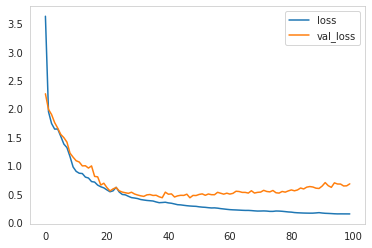

In [ ]:
for key in ['loss', 'val_loss']:
    plt.plot(k.history[key],label=key)
plt.legend()
plt.show()

In [ ]:
y_pred = model.predict(test)
y_predi = np.argmax(y_pred, axis=3)
test_annot = np.argmax(testannot, axis=3)
print(test_annot.shape,y_predi.shape)
def IoU(Yi,y_predi):
    ## mean Intersection over Union
    ## Mean IoU = TP/(FN + TP + FP)

    IoUs = []
    Nclass = int(np.max(Yi)) + 1
    for c in range(Nclass):
        TP = np.sum( (Yi == c)&(y_predi==c) )
        FP = np.sum( (Yi != c)&(y_predi==c) )
        FN = np.sum( (Yi == c)&(y_predi != c)) 
        IoU = TP/float(TP + FP + FN)
        print("class {}: #TP={:6.0f}, #FP={:6.0f}, #FN={:5.0f}, IoU={:4.3f}".format(label_colours[c],TP,FP,FN,IoU))
        IoUs.append(IoU)
    mIoU = np.mean(IoUs)
    print("_________________")
    print("Mean IoU: {:4.3f}".format(mIoU))
    
IoU(test_annot,y_predi)

(233, 224, 224) (233, 224, 224)
class Sky: #TP=1860080, #FP=150530, #FN=61990, IoU=0.897
class Building: #TP=2228555, #FP=485773, #FN=646422, IoU=0.663
class Pole: #TP= 23241, #FP= 53355, #FN=139106, IoU=0.108
class Road: #TP=2913655, #FP=218256, #FN=151290, IoU=0.887
class Pavement: #TP=911129, #FP=198066, #FN=205212, IoU=0.693
class Tree: #TP=997997, #FP=391462, #FN=285353, IoU=0.596
class SignSymbol: #TP= 38278, #FP= 79882, #FN=96403, IoU=0.178
class Fence: #TP= 10033, #FP= 48737, #FN=147786, IoU=0.049
class Car: #TP=336799, #FP=102451, #FN=140179, IoU=0.581
class Pedestrian: #TP= 22243, #FP= 64447, #FN=61922, IoU=0.150
class Bicyclist: #TP=  7669, #FP= 30348, #FN=34553, IoU=0.106
class Unlabelled: #TP=172477, #FP=345545, #FN=198636, IoU=0.241
_________________
Mean IoU: 0.429


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


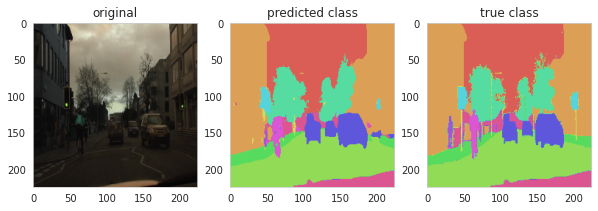

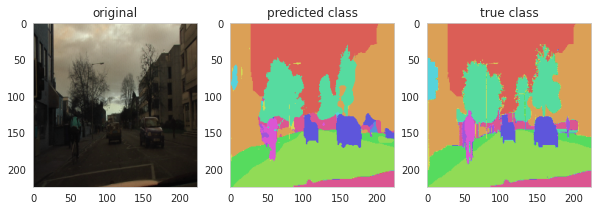

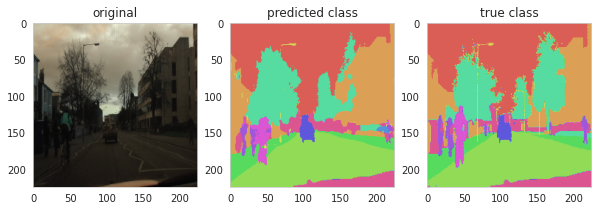

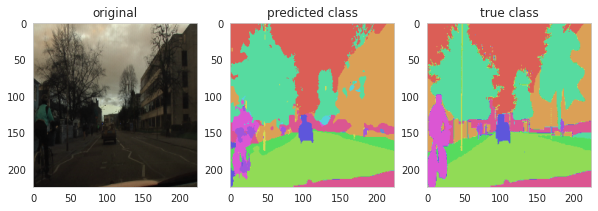

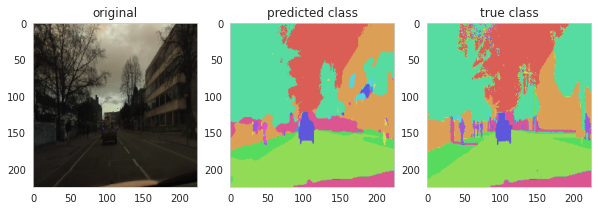

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


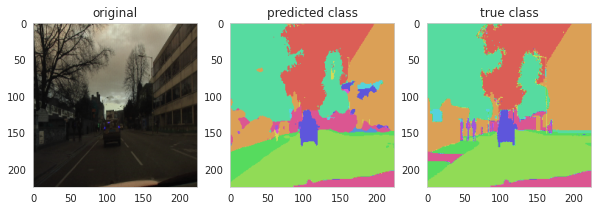

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


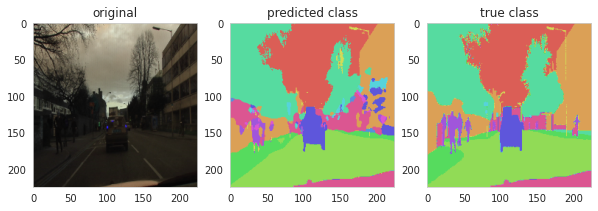

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


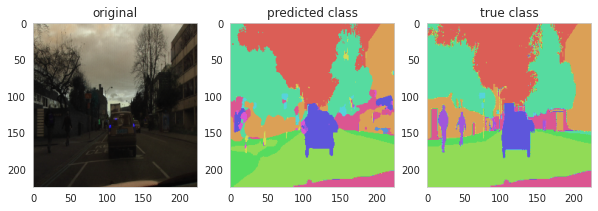

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


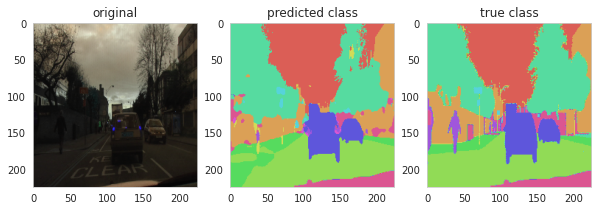

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


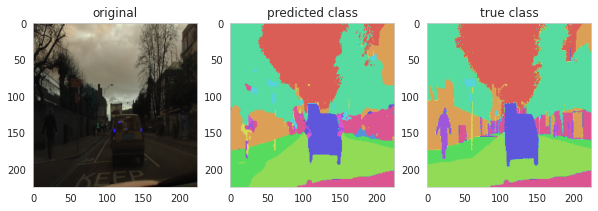

In [ ]:
shape = (224,224)
n_classes= 12

for i in range(10):
    img_is  = (test[i] + 1)
    seg = y_predi[i]
    segtest = test_annot[i]

    fig = plt.figure(figsize=(10,30))    
    ax = fig.add_subplot(1,3,1)
    ax.imshow(img_is/255.0)
    ax.set_title("original")
    
    ax = fig.add_subplot(1,3,2)
    ax.imshow(give_color_to_seg_img(seg,n_classes))
    ax.set_title("predicted class")
    
    ax = fig.add_subplot(1,3,3)
    ax.imshow(give_color_to_seg_img(segtest,n_classes))
    ax.set_title("true class")
    plt.show()

In [ ]:
# import random
def give_color_to_seg_img(seg,n_classes):
    '''
    seg : (input_width,input_height,3)
    '''
    
    if len(seg.shape)==3:
        seg = seg[:,:,0]
    seg_img = np.zeros( (seg.shape[0],seg.shape[1],3) ).astype('float')
    colors = sns.color_palette("hls", n_classes)
    
    for c in range(n_classes):
        segc = (seg == c)
        seg_img[:,:,0] += (segc*( colors[c][0] ))
        seg_img[:,:,1] += (segc*( colors[c][1] ))
        seg_img[:,:,2] += (segc*( colors[c][2] ))

    return(seg_img)

# input_height , input_width = 224 , 224
# output_height , output_width = 224 , 224


# ldseg = np.array(os.listdir(dir_seg))
# for fnm in ldseg[np.random.choice(len(ldseg),3,replace=False)]:
#     fnm = fnm.split(".")[0]
#     seg = cv2.imread(dir_seg + fnm + ".png") # (360, 480, 3)
#     img_is = cv2.imread(dir_img + fnm + ".png")
#     seg_img = give_color_to_seg_img(seg,n_classes)

#     fig = plt.figure(figsize=(20,40))
#     ax = fig.add_subplot(1,4,1)
#     ax.imshow(seg_img)
    
#     ax = fig.add_subplot(1,4,2)
#     ax.imshow(img_is/255.0)
#     ax.set_title("original image {}".format(img_is.shape[:2]))
    
#     ax = fig.add_subplot(1,4,3)
#     ax.imshow(cv2.resize(seg_img,(input_height , input_width)))
    
#     ax = fig.add_subplot(1,4,4)
#     ax.imshow(cv2.resize(img_is,(output_height , output_width))/255.0)
#     ax.set_title("resized to {}".format((output_height , output_width)))
#     plt.show()

In [ ]:
a = np.array([[1,2,3],[1,0,0],[0,0,1]])
b = [1,2,3,4]
print(np.log2(4))

2.0
